# CTR optimization

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

import time

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
df = pd.read_csv('/Users/Mark/code/MarkBerkovics/CTR-optimazation/data/Marketing campaign dataset.csv')

### Exploring the data

In [81]:
pd.options.display.max_columns = None
df.tail(50)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
72562,3563,0,2022-11-17,16,DV360,15595,NaN,NaN,#The X Factor - Fashion for the Fearless,NaN,https://www.abcjewelry.com/collections/vintage...,6334,Thailand,353,1905942.0,INR,64,Video,NaN,0.0,2085.122041,3947,176,INR,INR,1,41.076806,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,arm cuffs
72563,3563,1,2022-11-18,16,DV360,15595,NaN,NaN,#The X Factor - Fashion for the Fearless,NaN,https://www.abcjewelry.com/collections/chunky-...,6334,Thailand,353,1905942.0,INR,8,Social,NaN,0.0,2085.122041,7395,363,INR,INR,1,87.324848,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,vintage jewelry
72564,3563,2,2022-11-19,128,Facebook Ads,15595,NaN,NaN,#Embrace Your Individuality with X,NaN,https://www.abcjewelry.com/collections/bold-je...,6334,Thailand,353,1905942.0,INR,1,Display,NaN,0.0,2085.122041,6826,341,INR,INR,1,88.235918,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,unique and trendy jewelry
72565,3563,3,2022-11-20,128,Facebook Ads,15595,NaN,NaN,#Timeless X Style,NaN,https://www.abcjewelry.com/women/fashion-jewelry,6334,Thailand,353,1905942.0,INR,64,Video,NaN,0.0,2085.122041,7013,375,INR,INR,1,87.779621,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_end,office jewelry
72566,3563,4,2022-11-21,4,Google Ads,15595,NaN,NaN,#Embrace Your Individuality with X,NaN,https://www.abcjewelry.com/women/unique-jewelry/,6334,Thailand,353,1905942.0,INR,64,Video,NaN,0.0,2085.122041,6776,303,INR,INR,1,87.616965,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,rhinestone jewelry
72567,3563,5,2022-11-22,16,DV360,15595,NaN,NaN,#The Ultimate Fashion Statement with X,NaN,https://www.abcjewelry.com/collections/chunky-...,6334,Thailand,353,1905942.0,INR,1,Display,NaN,0.0,2085.122041,6928,276,INR,INR,1,87.626566,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,fashion jewelry for women
72568,3563,6,2022-11-23,16,DV360,15595,NaN,NaN,#The Ultimate Fashion Statement with X,NaN,https://www.abcjewelry.com/women/handmade-jewe...,6334,Thailand,353,1905942.0,INR,1,Display,NaN,0.0,2085.122041,6814,289,INR,INR,1,87.890401,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,jewelry sets
72569,3563,7,2022-11-24,16,DV360,15595,NaN,NaN,#Embrace Your Individuality with X,NaN,https://www.abcjewelry.com/collections/designe...,6334,Thailand,353,1905942.0,INR,8,Social,NaN,0.0,2085.122041,6653,307,INR,INR,1,88.214513,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,initial jewelry
72570,3563,8,2022-11-25,4,Google Ads,15595,NaN,NaN,#The Ultimate Fashion Statement with X,NaN,https://www.abcjewelry.com/collections/unique-...,6334,Thailand,353,1905942.0,INR,1,Display,NaN,0.0,2085.122041,7117,325,INR,INR,1,88.396079,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,pendant necklaces
72571,3563,9,2022-11-26,128,Facebook Ads,15595,NaN,NaN,#Be Bold. Be X,NaN,https://www.abcjewelry.com/collections/afforda...,6334,Thailand,353,1905942.0,INR,8,Social,NaN,0.0,2085.122041,7061,339,INR,INR,1,88.400284,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,concert jewelry


In [4]:
df.shape

(72612, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum().sort_values(ascending=False)

unique_reach           72612
total_reach            72612
position_in_content    72612
max_bid_cpm            65206
creative_width          3412
creative_height         3412
template_id             3412
approved_budget          406
exchange_rate              0
clicks                     0
stats_currency             0
currency_code              0
campaign_item_id           0
media_cost_usd             0
campaign_budget_usd        0
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
impressions                0
channel_name               0
network_margin             0
no_of_days                 0
channel_id                 0
advertiser_currency        0
network_id                 0
advertiser_name            0
advertiser_id              0
landing_page               0
search_tags                0
creative_id                0
ext_service_name           0
ext_service_id             0
time                       0
keywords      

### Preprocessing

In [8]:
df_preproc = df.copy()

#### Droping unnecessary columns that have Nans

In [9]:
df_preproc.drop(columns = ['unique_reach', 'total_reach', 'position_in_content', 'max_bid_cpm'], inplace=True)

In [10]:
df_preproc.drop(columns = ['approved_budget'], inplace=True)

#### Imputing necessary columns that have Nans

In [11]:
df_preproc.isnull().sum().sort_values(ascending=False)

creative_width         3412
creative_height        3412
template_id            3412
campaign_item_id          0
network_margin            0
weekday_cat               0
timezone                  0
cmi_currency_code         0
search_tag_cat            0
media_cost_usd            0
exchange_rate             0
currency_code             0
stats_currency            0
clicks                    0
impressions               0
campaign_budget_usd       0
channel_id                0
channel_name              0
no_of_days                0
advertiser_currency       0
network_id                0
advertiser_name           0
advertiser_id             0
landing_page              0
search_tags               0
creative_id               0
ext_service_name          0
ext_service_id            0
time                      0
keywords                  0
dtype: int64

array([[<Axes: title={'center': 'template_id'}>]], dtype=object)

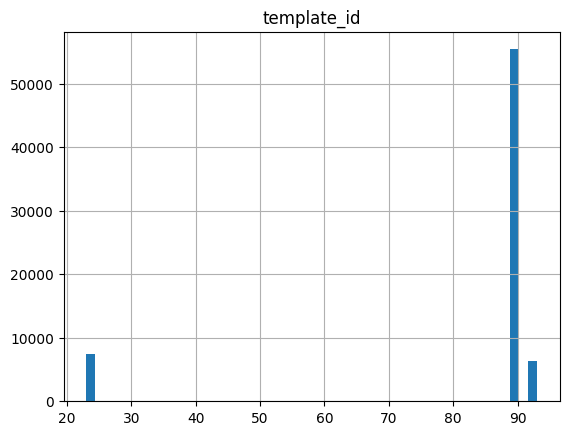

In [12]:
df_preproc[['template_id']].hist(bins=50)

array([[<Axes: title={'center': 'creative_width'}>]], dtype=object)

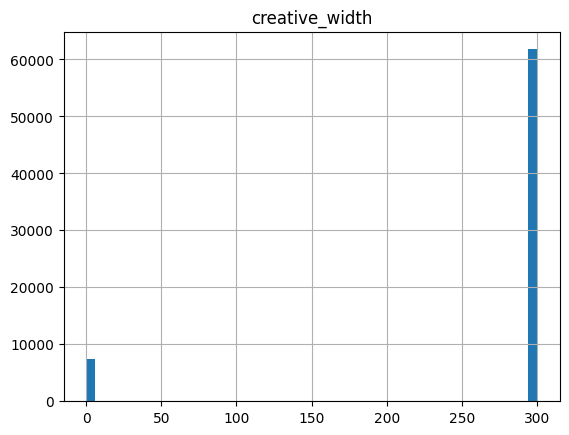

In [13]:
df_preproc[['creative_width']].hist(bins=50)

array([[<Axes: title={'center': 'creative_height'}>]], dtype=object)

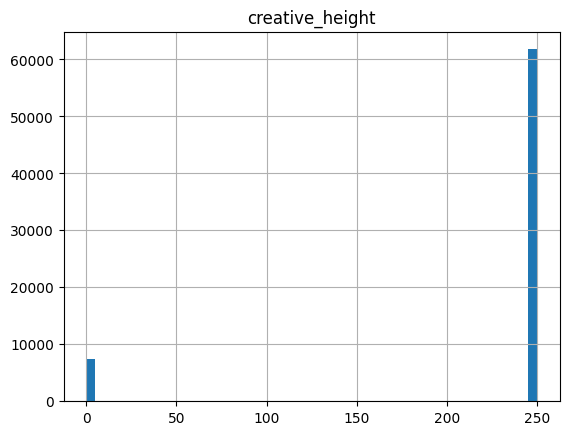

In [14]:
df_preproc[['creative_height']].hist(bins=50)

In [15]:
template_id_imputer = SimpleImputer(strategy='most_frequent')
creative_width_imputer = SimpleImputer(strategy='most_frequent')
creative_height_imputer = SimpleImputer(strategy='most_frequent')

In [16]:
df_preproc['template_id'] = template_id_imputer.fit_transform(df_preproc[['template_id']])

In [17]:
df_preproc['creative_width'] = creative_width_imputer.fit_transform(df_preproc[['creative_width']])

In [18]:
df_preproc['creative_height'] = creative_height_imputer.fit_transform(df_preproc[['creative_height']])

In [19]:
df_preproc.isnull().sum().sort_values(ascending=False)

campaign_item_id       0
no_of_days             0
weekday_cat            0
timezone               0
cmi_currency_code      0
search_tag_cat         0
media_cost_usd         0
exchange_rate          0
currency_code          0
stats_currency         0
clicks                 0
impressions            0
campaign_budget_usd    0
network_margin         0
channel_name           0
channel_id             0
advertiser_currency    0
network_id             0
advertiser_name        0
advertiser_id          0
landing_page           0
template_id            0
search_tags            0
creative_height        0
creative_width         0
creative_id            0
ext_service_name       0
ext_service_id         0
time                   0
keywords               0
dtype: int64

#### Converting the 'time' columns to date-time format 

In [20]:
df_preproc['time'] = pd.to_datetime(df_preproc['time'])

#### Checking for correlated features

<Axes: >

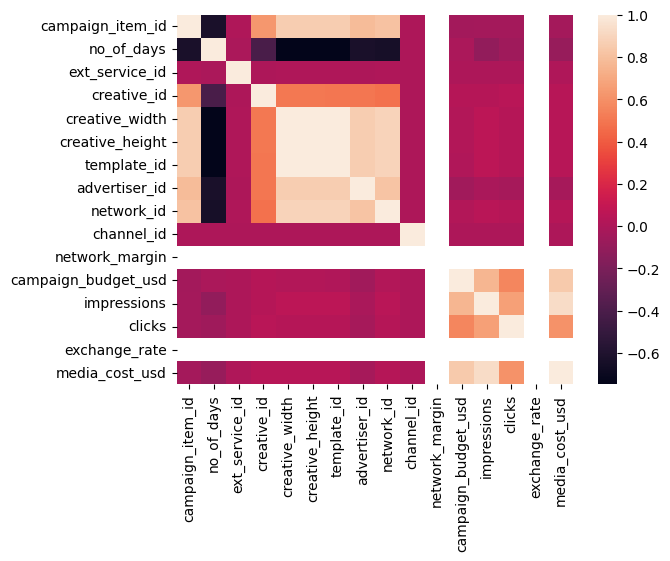

In [21]:
sns.heatmap(df_preproc.select_dtypes(include='number').corr())

### Feature selection and engineering

In [22]:
X = df_preproc[['no_of_days', 'ext_service_id', 'creative_id', 'template_id', 
                'advertiser_id', 'network_id', 'channel_id', 'media_cost_usd']]

In [23]:
df_preproc['weekday_cat'].unique()

array(['week_end', 'week_day'], dtype=object)

In [24]:
X['weekday_cat'] = 0

In [25]:
X['weekday_cat'][df_preproc['weekday_cat']=='week_end'] = 1

In [26]:
X.head()

,no_of_days,ext_service_id,creative_id,template_id,advertiser_id,network_id,channel_id,media_cost_usd,weekday_cat
0,7,128,1000,90.0,4756,190,32,14.058514,1
1,8,16,1000,90.0,4756,190,8,99.633496,0
2,9,128,1000,90.0,4756,190,8,109.419677,0
3,10,128,1000,90.0,4756,190,64,115.209499,0
4,11,4,1000,90.0,4756,190,32,66.990104,0


In [27]:
y = (df_preproc['clicks'] / df_preproc['impressions']) * 100

In [28]:
y.sort_values()

17216      0.088731
18714      0.098264
17225      0.102722
17222      0.104589
20231      0.106572
            ...    
70319    141.971207
70320    163.190416
16256    184.370814
16254    236.477935
16255    265.611691
Length: 72612, dtype: float64

### Exploratory data analysis

In [29]:
df_compact = X.copy()

In [30]:
df_compact['CTR'] = y

In [31]:
df_compact

,no_of_days,ext_service_id,creative_id,template_id,advertiser_id,network_id,channel_id,media_cost_usd,weekday_cat,CTR
0,7,128,1000,90.0,4756,190,32,14.058514,1,0.955795
1,8,16,1000,90.0,4756,190,8,99.633496,0,1.670463
2,9,128,1000,90.0,4756,190,8,109.419677,0,1.498829
3,10,128,1000,90.0,4756,190,64,115.209499,0,2.062742
4,11,4,1000,90.0,4756,190,32,66.990104,0,1.300390
...,...,...,...,...,...,...,...,...,...,...
72607,11,4,15605,90.0,6304,353,32,4.858090,0,5.288008
72608,12,128,15605,90.0,6304,353,4,3.536262,0,4.739884
72609,13,128,15605,90.0,6304,353,64,1.947816,0,3.250774
72610,14,4,15605,90.0,6304,353,8,1.711467,0,3.039514


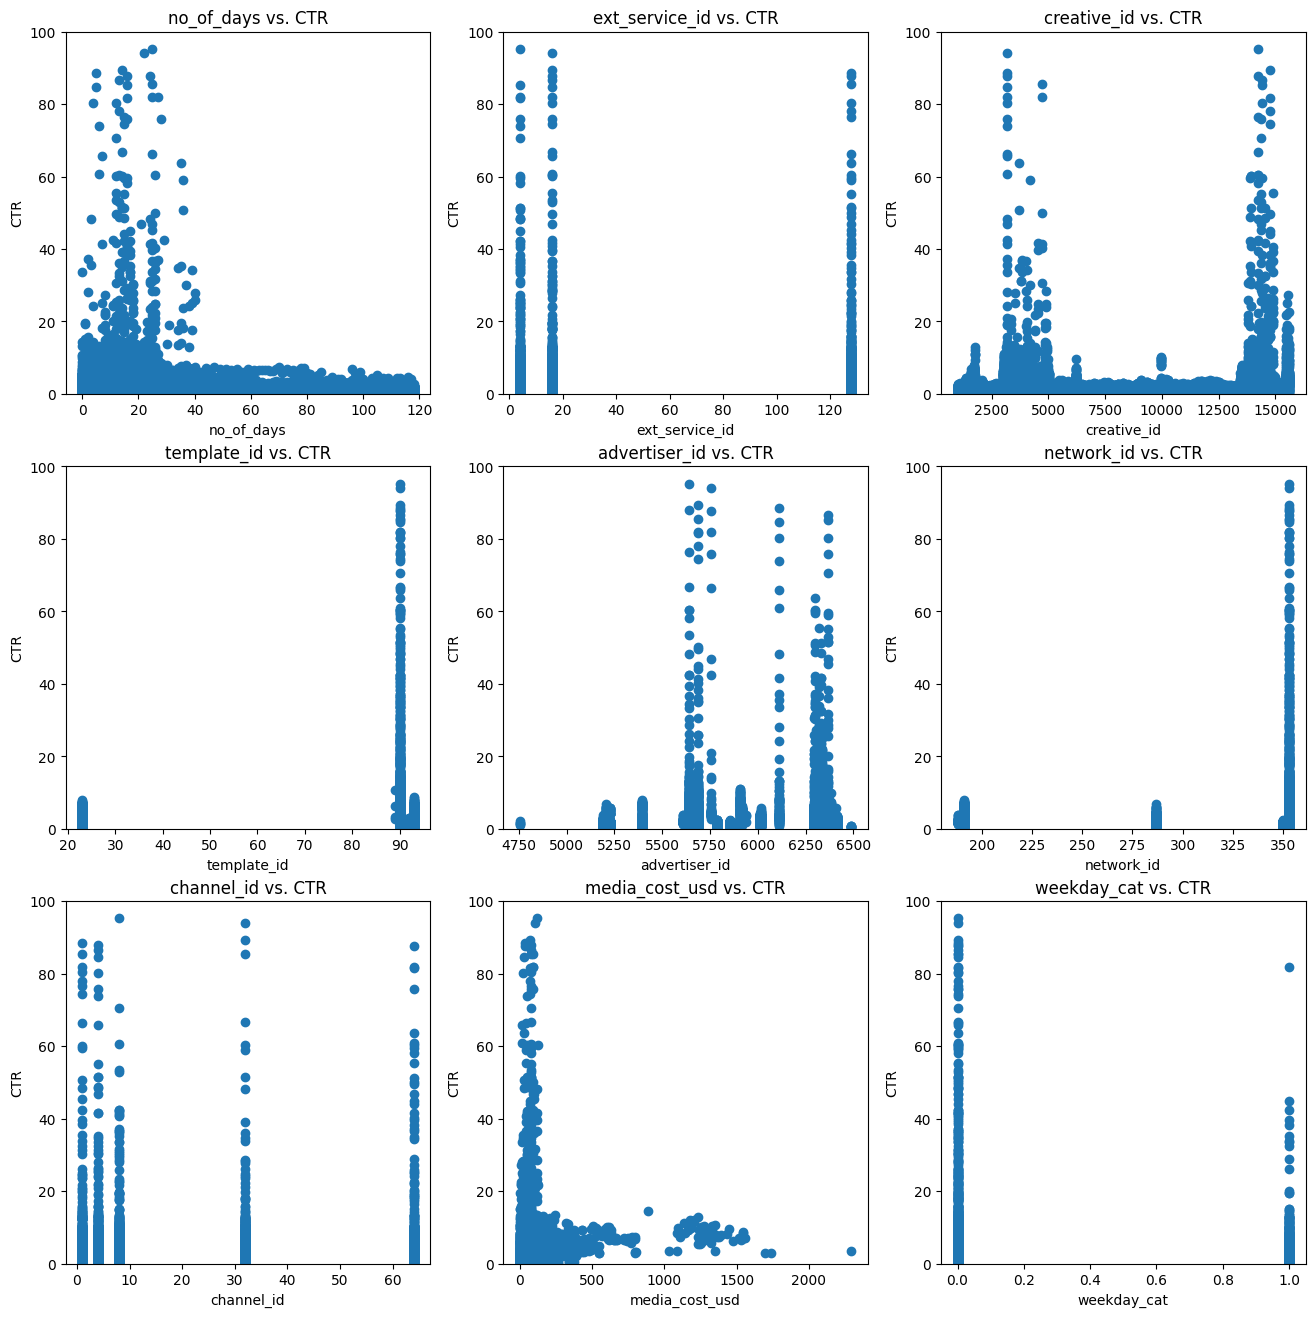

In [79]:
plt.figure(figsize=(16,16))

for i, col in enumerate(list(X.columns)):
    plt.subplot(3, 3, i+1)
    plt.scatter(df_compact[col], df_compact['CTR'])
    plt.title(col + ' vs. CTR')
    plt.xlabel(col)
    plt.ylabel('CTR')
    plt.ylim(0,100)

### Scaling the features

array([[<Axes: title={'center': 'no_of_days'}>,
        <Axes: title={'center': 'ext_service_id'}>,
        <Axes: title={'center': 'creative_id'}>],
       [<Axes: title={'center': 'template_id'}>,
        <Axes: title={'center': 'advertiser_id'}>,
        <Axes: title={'center': 'network_id'}>],
       [<Axes: title={'center': 'channel_id'}>,
        <Axes: title={'center': 'media_cost_usd'}>,
        <Axes: title={'center': 'weekday_cat'}>]], dtype=object)

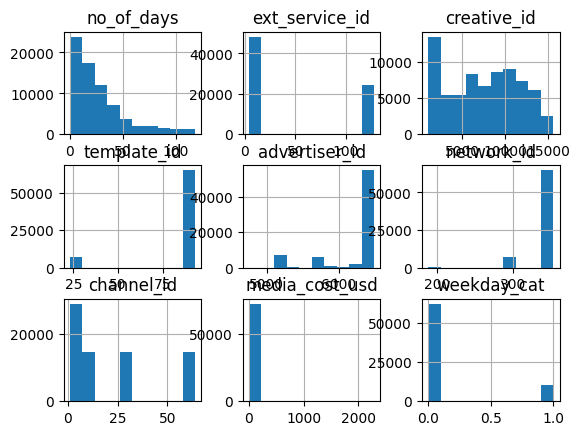

In [33]:
X.hist()

<Axes: >

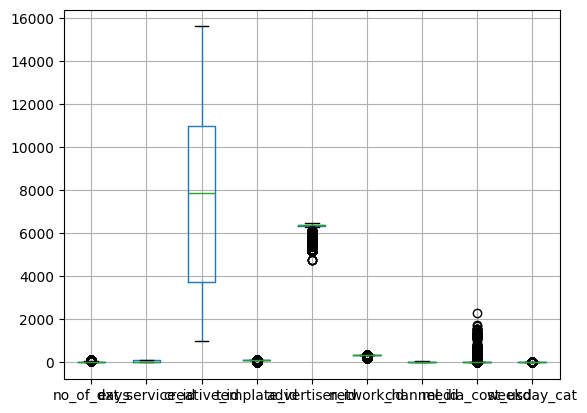

In [34]:
X.boxplot()

In [35]:
scaler = MinMaxScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled

,no_of_days,ext_service_id,creative_id,template_id,advertiser_id,network_id,channel_id,media_cost_usd,weekday_cat
0,0.059322,1.000000,0.0,0.957143,0.000000,0.012121,0.492063,0.006126,1.0
1,0.067797,0.096774,0.0,0.957143,0.000000,0.012121,0.111111,0.043413,0.0
2,0.076271,1.000000,0.0,0.957143,0.000000,0.012121,0.111111,0.047677,0.0
3,0.084746,1.000000,0.0,0.957143,0.000000,0.012121,1.000000,0.050200,0.0
4,0.093220,0.000000,0.0,0.957143,0.000000,0.012121,0.492063,0.029189,0.0
...,...,...,...,...,...,...,...,...,...
72607,0.093220,0.000000,1.0,0.957143,0.892734,1.000000,0.492063,0.002117,0.0
72608,0.101695,1.000000,1.0,0.957143,0.892734,1.000000,0.047619,0.001541,0.0
72609,0.110169,1.000000,1.0,0.957143,0.892734,1.000000,1.000000,0.000849,0.0
72610,0.118644,0.000000,1.0,0.957143,0.892734,1.000000,0.111111,0.000746,0.0


### Modeling

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [38]:
X_train

,no_of_days,ext_service_id,creative_id,template_id,advertiser_id,network_id,channel_id,media_cost_usd,weekday_cat
37448,0.305085,1.000000,0.486135,0.957143,0.942907,1.0,1.000000,0.000064,0.0
5991,0.898305,1.000000,0.043478,0.000000,0.261246,0.6,0.492063,0.000590,0.0
36592,0.305085,1.000000,0.473810,0.957143,0.942907,1.0,0.492063,0.006075,0.0
5292,0.567797,0.000000,0.040055,0.000000,0.261246,0.6,0.047619,0.002187,0.0
52421,0.059322,1.000000,0.661417,0.957143,0.946367,1.0,0.000000,0.000338,0.0
...,...,...,...,...,...,...,...,...,...
71199,0.008475,0.000000,0.931530,0.957143,0.908304,1.0,0.111111,0.010816,0.0
21752,0.093220,0.000000,0.256761,1.000000,0.536332,1.0,0.492063,0.007643,0.0
16441,0.144068,0.000000,0.154057,0.957143,0.728374,1.0,0.492063,0.006508,1.0
21241,0.203390,0.096774,0.246833,0.957143,0.908304,1.0,0.047619,0.032483,1.0


In [39]:
lin_reg = LinearRegression()

In [40]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [41]:
svm_reg = SVR()

In [42]:
xgb_reg = xgb.XGBRegressor()

In [43]:
models = [lin_reg, knn_reg, svm_reg, svm_reg]

In [44]:
cv_scores = []

# for model in models:
#     cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
#     cv_scores.append(cv_score.mean())

In [45]:
cv_score = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=5)

In [46]:
cv_scores.append(cv_score.mean())

In [47]:
cv_score = cross_val_score(knn_reg, X_train, y_train, scoring='r2', cv=5)

In [48]:
cv_scores.append(cv_score.mean())

In [49]:
cv_score = cross_val_score(svm_reg, X_train, y_train, scoring='r2', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.6min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


In [50]:
cv_scores.append(cv_score.mean())

In [51]:
cv_score = cross_val_score(xgb_reg, X_train, y_train, scoring='r2', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [52]:
cv_scores.append(cv_score.mean())

In [53]:
cv_scores

[0.06488011493672016,
 0.0892102303601077,
 0.07884626819835794,
 0.5729495900208088]

In [54]:
models_dict = {
                'models': ['linear', 'knn', 'svm', 'xgb'],
                'scores': cv_scores
}

models_df = pd.DataFrame(models_dict)

In [55]:
models_df.sort_values(by='scores', ascending=False)

,models,scores
3,xgb,0.572950
1,knn,0.089210
2,svm,0.078846
0,linear,0.064880


#### Fine tuning XGBoost

In [56]:
xgb_reg = xgb.XGBRegressor()

parameters = {'n_estimators': [5000, 7500, 10000], 
              'max_depth':[5, 6, 7],
              'learning_rate': [0.001, 0.005, 0.01],
             }

search = GridSearchCV(xgb_reg, parameters, scoring='r2', n_jobs=-1)

In [57]:
start = time.time()

search.fit(X_train, y_train)

end = time.time()
print(end-start)

988.385627746582


In [59]:
search.best_score_

0.6108265019681155

In [60]:
search.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 5000}

In [61]:
search.scorer_

make_scorer(r2_score, response_method='predict')

In [62]:
search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Using the best hyper parameters

In [64]:
xgb_reg = xgb.XGBRegressor(n_estimators=5000, max_depth=6, learning_rate=0.01)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Evaluating the model

In [65]:
y_pred = xgb_reg.predict(X_test)

In [76]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

In [77]:
rmse

1.6047688887807943